In [34]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

warnings.filterwarnings('ignore')

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1/255.0, # Scaling or normalisation.
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
training_set = train_datagen.flow_from_directory('../b. Datasets/Flower Images/Training', 
                                                 target_size=(128, 128), 
                                                 batch_size=128,
                                                 class_mode='categorical')

Found 2736 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('../b. Datasets/Flower Images/Testing', 
                                        target_size=(128, 128), 
                                                batch_size=128,
                                                class_mode='categorical')

Found 934 images belonging to 5 classes.


In [15]:
model = Sequential()

# Convolutional layer with 16 kernels each of size 2x2
# This layer accepts the images with size 128x128x3
model.add(Conv2D(16, (3, 3), 
          input_shape = (128, 128, 3), 
          activation='relu'))

# Maxpooling layer generally defined at the end of each convolutional
# Pool size of 2x2 will bring down the feature map size by hald.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize activations
model.add(Activation('relu'))    # Apply activation
model.add(Dropout(0.5))          # Dropout for regularization

model.add(Dense(units=5, activation='softmax')) # Output layer

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(training_set,
           steps_per_epoch = 2736//128,
           epochs=5,
           validation_data = test_set,
           validation_steps = 934//128)

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3568 - loss: 4.0267 - val_accuracy: 0.3292 - val_loss: 3.2128
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 3.0557 - val_accuracy: 0.1053 - val_loss: 3.2739
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5240 - loss: 2.7909 - val_accuracy: 0.4062 - val_loss: 2.6959
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5469 - loss: 2.3512 - val_accuracy: 0.4474 - val_loss: 2.6976
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5562 - loss: 2.1955 - val_accuracy: 0.3259 - val_loss: 2.3534


In [21]:
model.layers[0]

<Conv2D name=conv2d_3, built=True>

In [25]:
model.layers[0].output

<KerasTensor shape=(None, 126, 126, 16), dtype=float32, sparse=False, name=keras_tensor_80>

In [26]:
model.layers[0].input

<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=False, name=keras_tensor_79>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


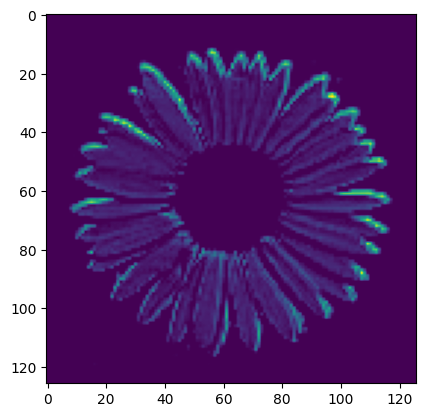

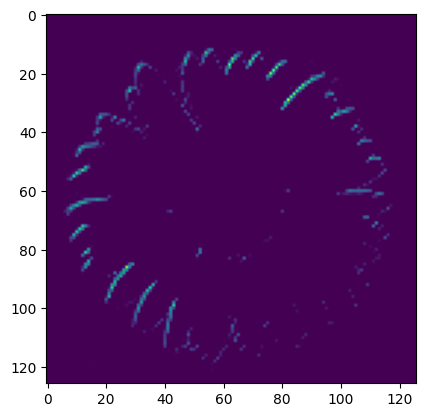

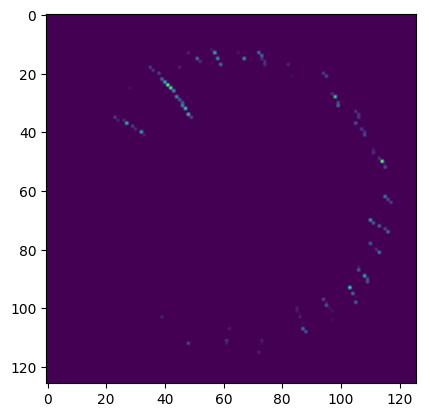

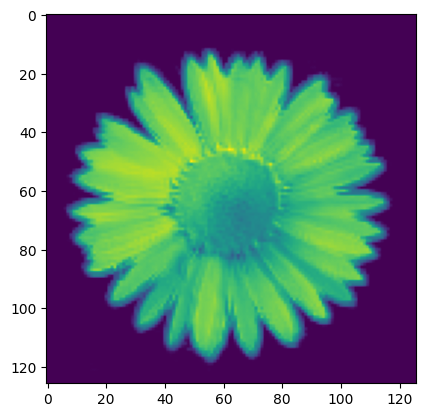

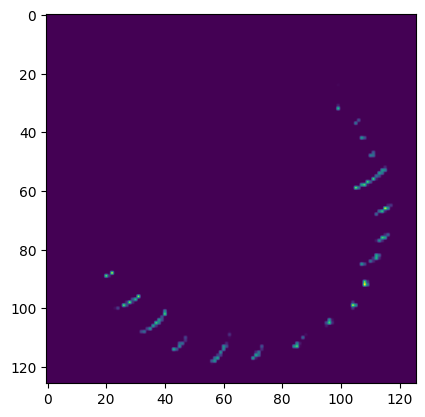

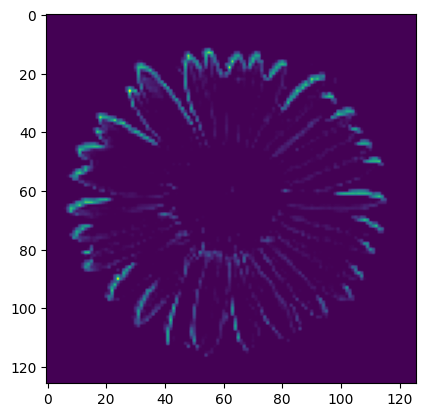

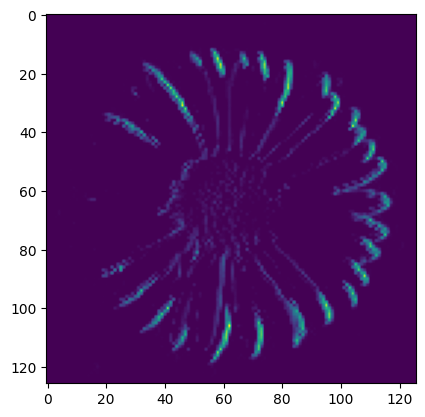

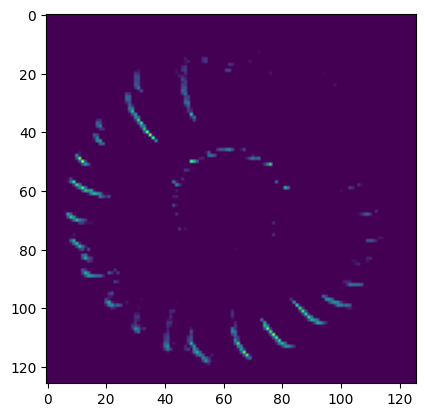

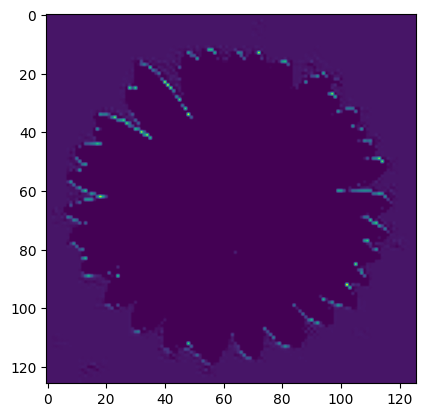

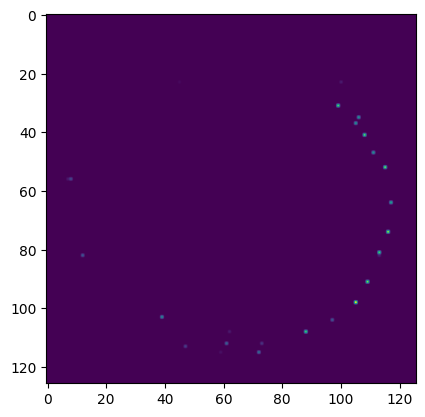

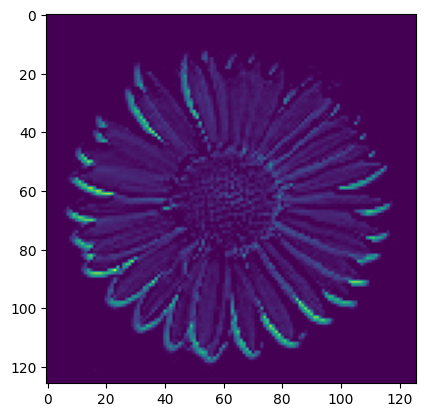

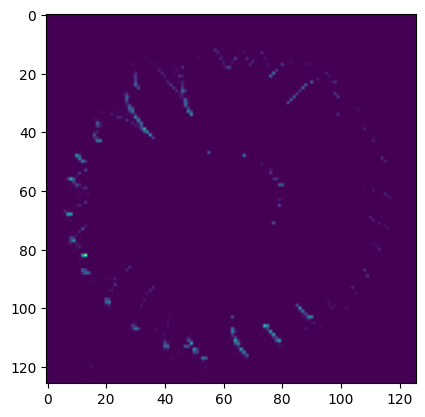

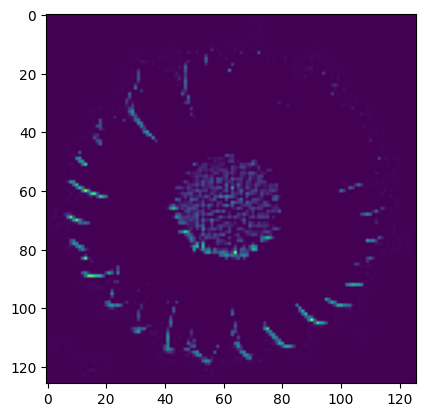

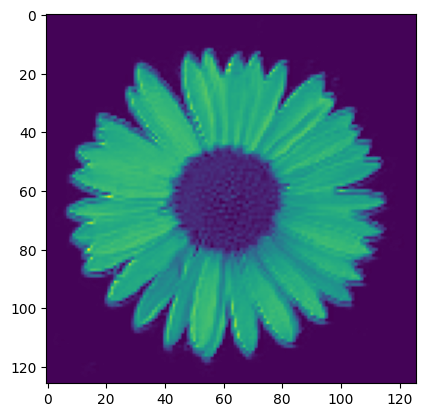

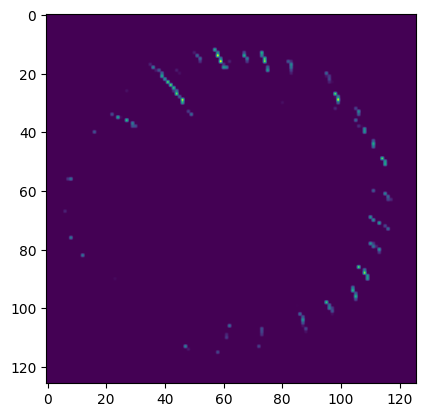

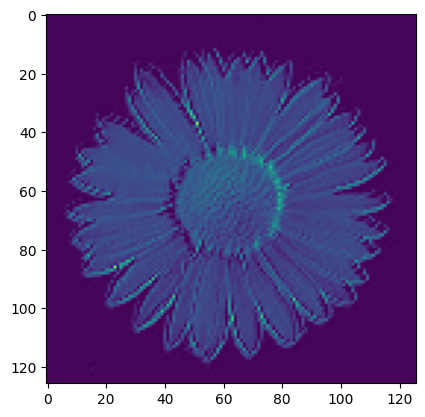

In [ ]:
image_path = '../b. Datasets/Flower Images/Training/daisy/21652746_cc379e0eea_m.jpg'

viz_model = tf.keras.models.Model(inputs=model.layers[0].input, 
                                  outputs=model.layers[0].output)

image = load_img(image_path, target_size=(128, 128))
X = img_to_array(image)
X = np.expand_dims(X, 0)
X = X / 255.0

feature_maps = viz_model.predict(X)
for iter in range(0, feature_maps.shape[-1]):
    plt.imshow(feature_maps[:, :, :, iter][0])
    plt.show()

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,890,993 (18.66 MB)

 Trainable params: 1,630,245 (6.22 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 3,260,492 (12.44 MB)

In [38]:
viz_model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 448 (1.75 KB)

 Trainable params: 448 (1.75 KB)

 Non-trainable params: 0 (0.00 B)